# Tasks 4
Use scikit-learn to apply “kNN” means for k Nearest Neighbours
clustering to Fisher’s famous Iris data set.
You will easily obtain a copy of the data set online.
Explain in a Markdown cell how your code works and how accurate it might be,
and then explain how your model could be used to make predictions of Species of Iris.

The author is Muhammad Noman Junaid (G00351754@gmit.ie).

### Research 
### KNN

KNN (K-Nearest Neighbor) is a simple supervised classification algorithm we can use to assign a class to new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.

### Steps Of KNN

- Computes the distance between the new data point with every training example.
- For computing the distance measures such as Euclidean distance, Hamming distance or Manhattan distance will be used.
- Model picks K entries in the database which are closest to the new data point.
- Then it does the majority vote i.e the most common class/label among those K entries will be the class of the new data point.

Below example shows the implementation of KNN on iris dataset using scikit-learn library. Iris dataset has 50 samples for each different species of Iris flower(total of 150). For each sample we have sepal length, width and petal length and width and a species name(class/label)

In [2]:
#### Import the load_iris function from datasets module 
from sklearn.datasets import load_iris 

In [3]:
#### Create bunch onject containing iris dataset and its attributes. 
iris = load_iris()

In [14]:
type (iris)

sklearn.utils.Bunch

In [16]:
#### print the iris data
iris.data 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [78]:
X = iris.data
Y = iris.target

In [79]:
#### Names of 4 features (column names)
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [80]:
#### Integers representing the spices: 0 = setosa, 1=versicolor, 2=virginica 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [81]:
#### Name of 3 classes of target 
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [82]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [83]:
#### we have a total of 150 obseravtion and 4 features 
print(iris.data.shape)

(150, 4)


In [84]:
#### splitting the data into training ansd test sets (80:20)
from sklearn.model_selection import train_test_split


In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [99]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [100]:
print(Y_train.shape)
print(Y_test.shape)

(120,)
(30,)


In [101]:
#### import the KNeighbourClassifier class form sklearn 
from sklearn.neighbors import KNeighborsClassifier

#### import metrics model to check the accuracy 
from sklearn import metrics 
#### try running from k=1 through 25 and record testing accuracy 
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred= knn.predict(X_test) 
    scores [k] = metrics.accuracy_score(Y_test,Y_pred)
    scores_list.append(metrics.accuracy_score(Y_test,Y_pred))


Text(0, 0.5, 'Testing Accuracy')

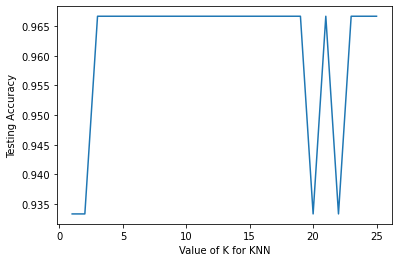

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
#### plot the relationship between K and the testing accuracy 
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [109]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [110]:
#### 0=setosa, 1=versicolor, 2=virginica
classes = {0:'setosa' ,1:'versicolor' ,2:'virginica'}

#### Making prediction an some unseen data
##### predict for the below two random observation 

x_new =[[3,4,5,2],
       [5,4,2,2]]
y_predict = knn.predict(x_new)
print (classes[y_predict[0]])
print (classes[y_predict[1]])

versicolor
setosa


### how to use this model

- Step1: Import the required data and check the features.
- Step2: Split the data and Train the Model.
- step3: Import the class ‘KNeighborsClassifer’ and create the instance of knn

## References

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

https://rstudio-pubs-static.s3.amazonaws.com/369869_fe1a8a1a1b1c4145b5b6f22b96df8345.html

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

Iris DataSet
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html